##***Flight Crash Severity Prediction:***

##How severe can an airplane accident be?

Problem

Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.
 

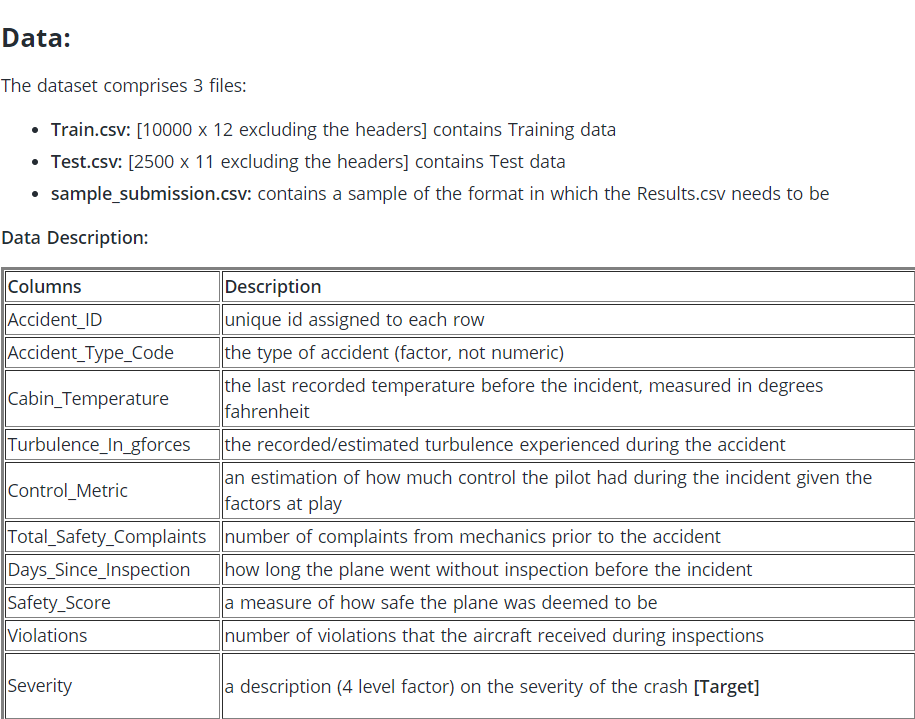

##Flight Crash Severity Prediction:  Using Machine Leraning Model



Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import and reading file using pandas lib

In [4]:
#import Train Data Sets From Database
Train_Data=pd.read_csv("train.csv")
Train_Data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
#import Test Data Sets From Database
Test_Data=pd.read_csv("test.csv")
Test_Data.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


#Data Perprocessing
Understanding Data_set using Pandas Lib

In [6]:
Train_Data.shape # Count total Shape of data Avaloade in Datasts

(10000, 12)

In [ ]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [ ]:
Train_Data.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


# Analysis of missing values (NaNs)
Find the Null values in Data Sets And Replace the null values using 'ffill' method or Median

In [7]:
Train_Data.isna().sum()  #Find the Null values in Data Sets using isna() and count using sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

There is no null value in datasets

#Features Seleaction
Seleact Required Features form data_Sets to build a model that can predict the prices of the different packages

Find Depandent and Indepandent variables using datasets,where x are independent values and y : dependent values

In [8]:
X=Train_Data.drop(['Severity', 'Accident_ID'],axis=1)   # Independent Variables
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [9]:
y=Train_Data.Severity
print(y.head())

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object


In [10]:
y.unique()  # Display All Unique items And Variables are available is Y (Traget) varaiable

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

# y Depandent variable are Catgorical data
As we can see in the above output,the last column contains categorical variables which are not suitable to apply directly for fitting in model.So we need to encode this variable.

In [11]:
y.map({'Minor_Damage_And_Injuries':0, 'Significant_Damage_And_Fatalities':1, 'Significant_Damage_And_Serious_Injuries':2, 'Highly_Fatal_And_Damaging':3})

0       0
1       0
2       1
3       2
4       1
       ..
9995    2
9996    3
9997    2
9998    0
9999    3
Name: Severity, Length: 10000, dtype: int64

In [12]:
print('Percentage of each class in Target Variable \n')
print((Train_Data.Severity.value_counts()/len(Train_Data))*100)

Percentage of each class in Target Variable 

Highly_Fatal_And_Damaging                  30.49
Significant_Damage_And_Serious_Injuries    27.29
Minor_Damage_And_Injuries                  25.27
Significant_Damage_And_Fatalities          16.95
Name: Severity, dtype: float64


##Drow HeatMap Using Correlation of DataSets

In [32]:
Train_Data.corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


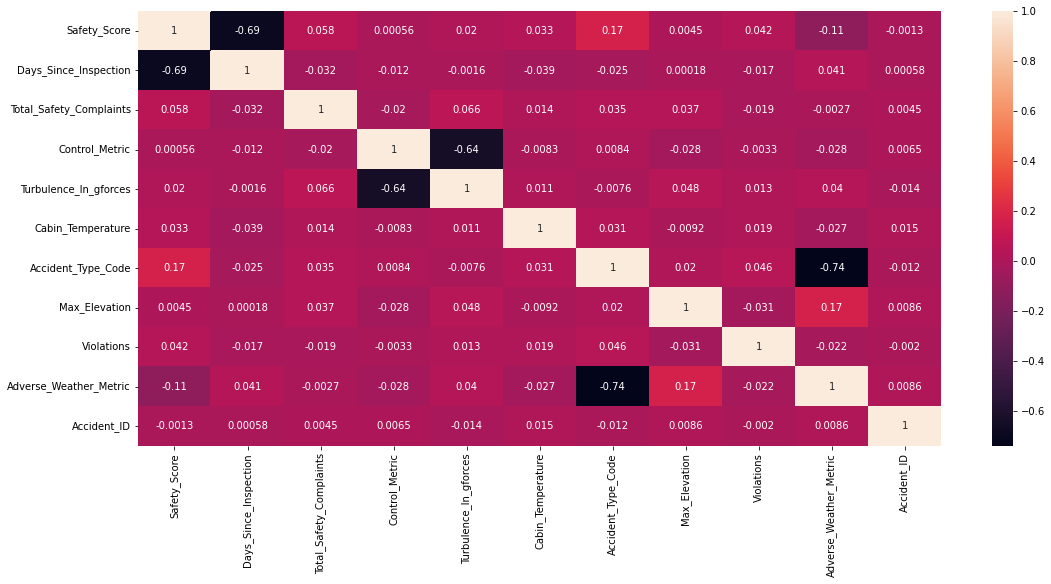

In [34]:
plt.figure(figsize=(18,8))
HeatMap=sns.heatmap(Train_Data.corr(),annot=True)

##Drow Pair Plot Using Train_Data Sets

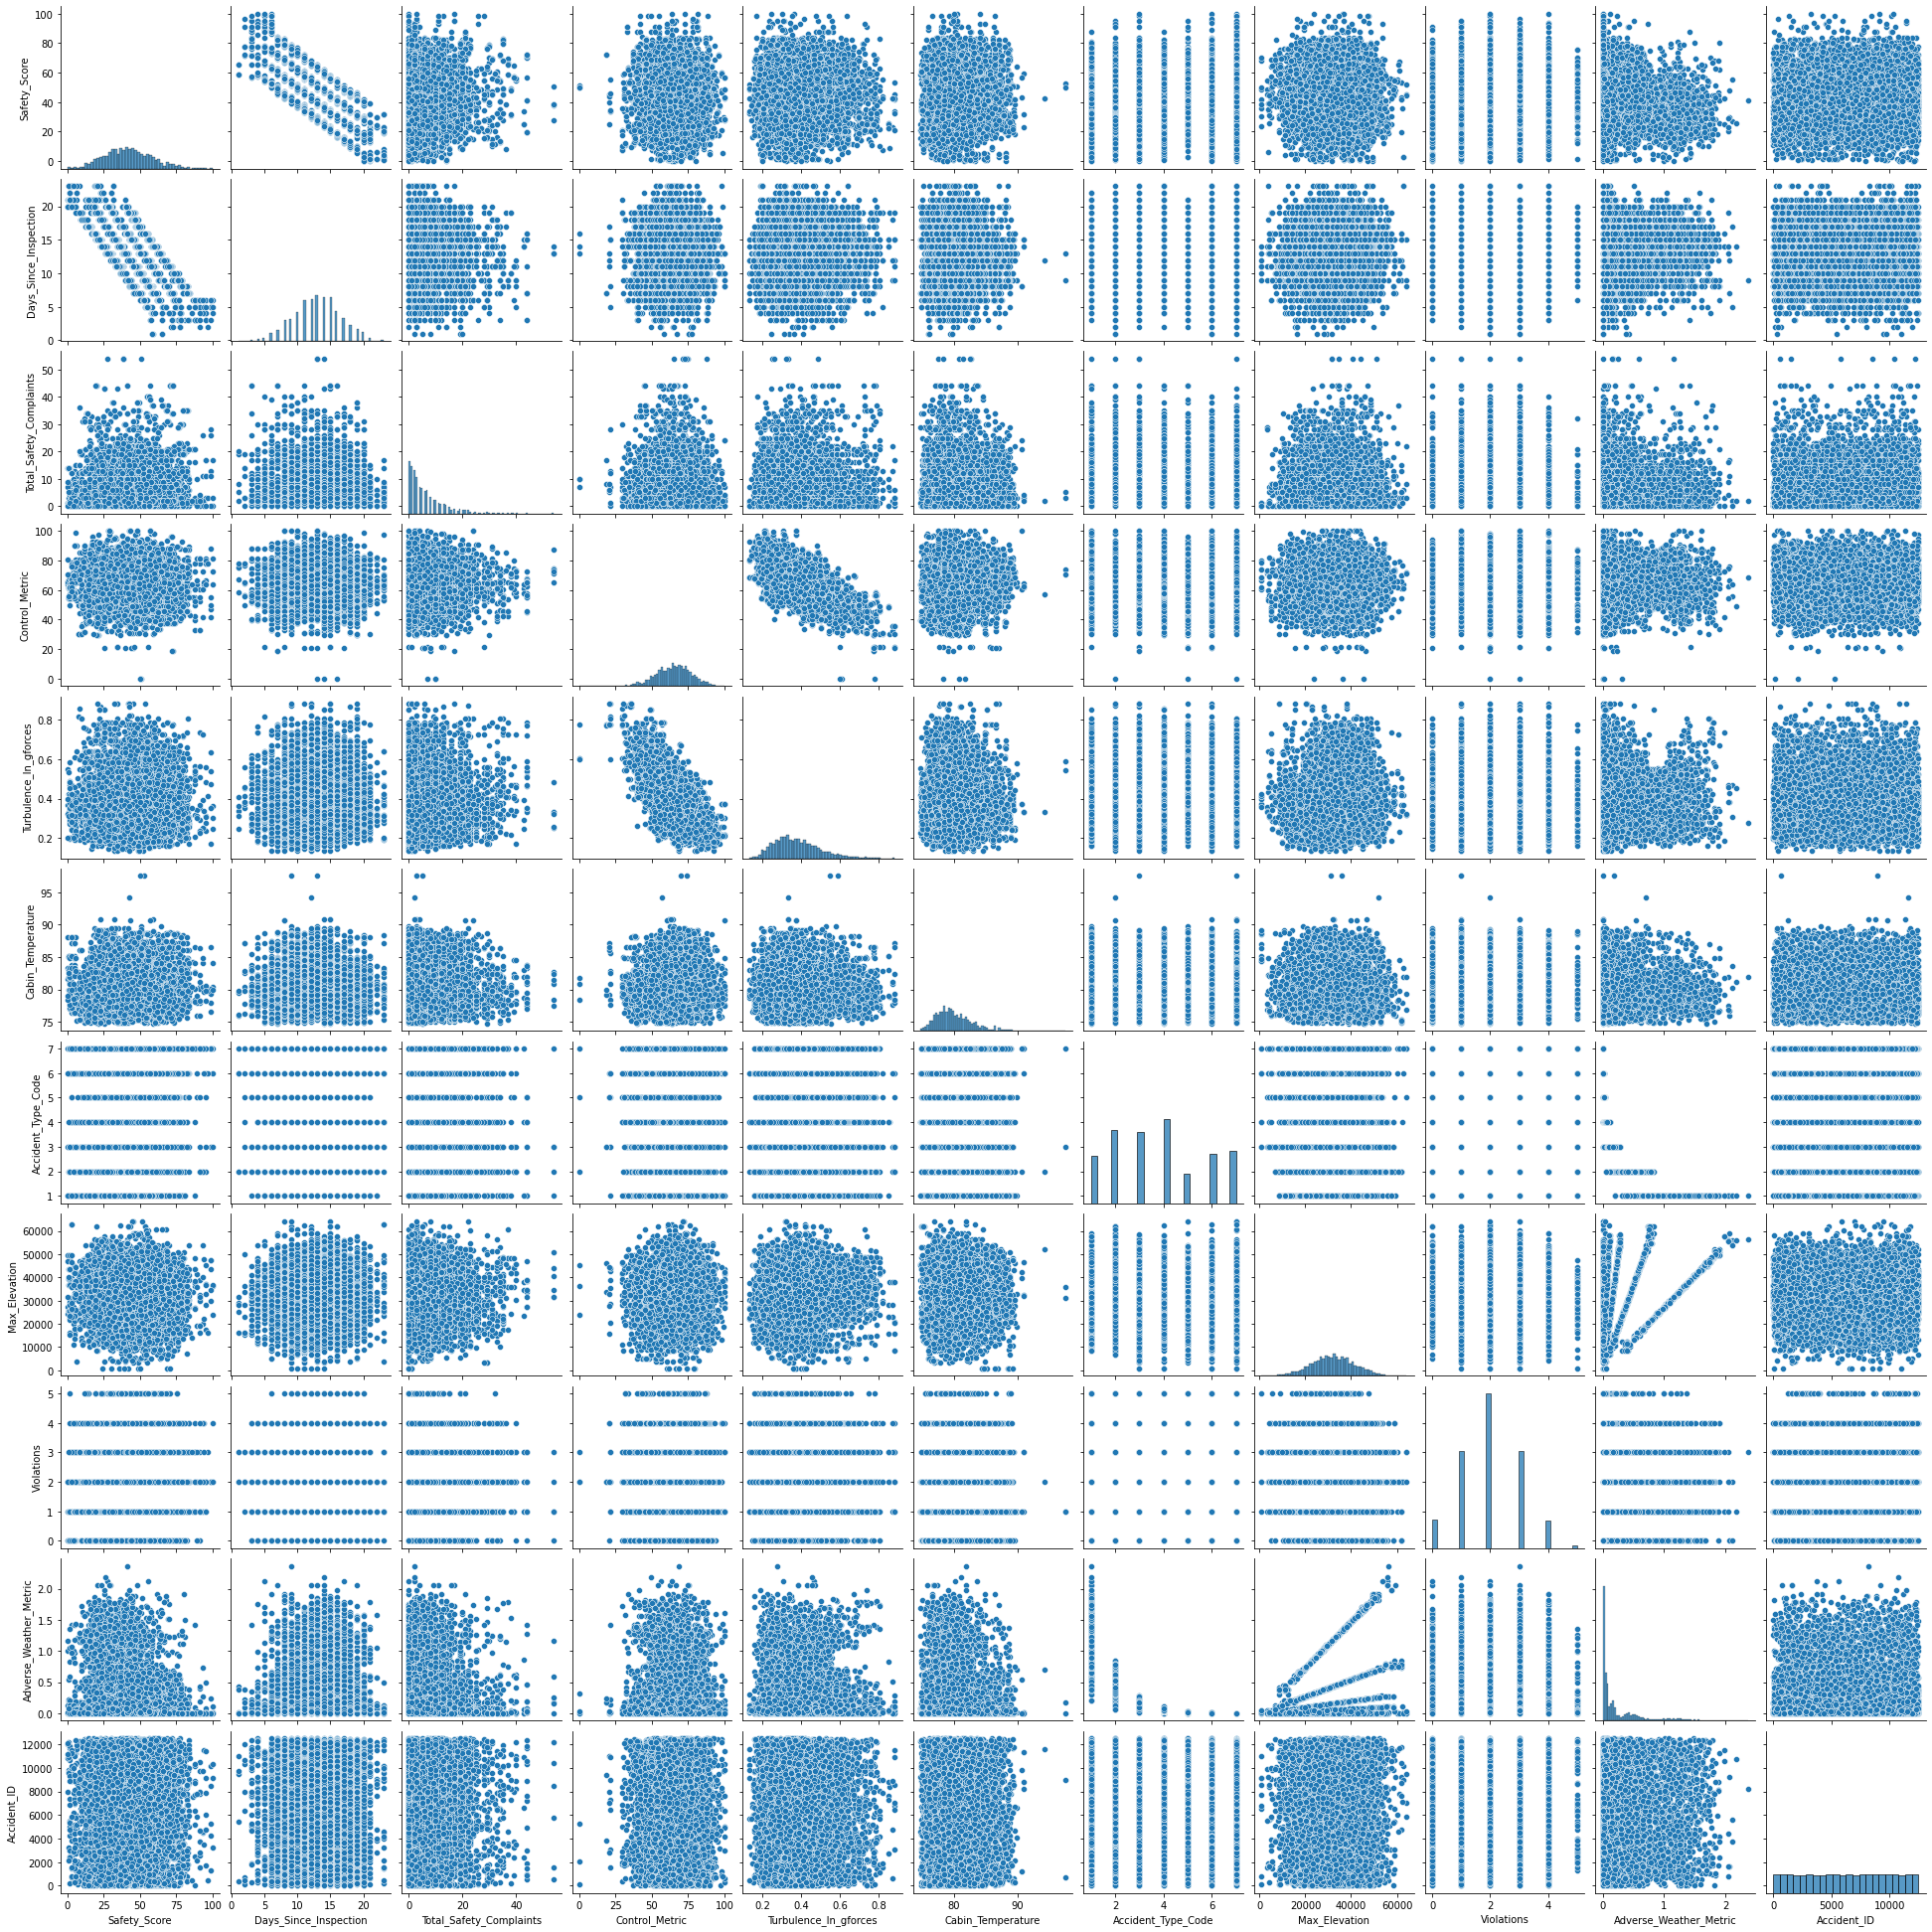

In [35]:
PairPlot=sns.pairplot(Train_Data,height=2.5)

#Distribution of Target Variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, '# of records'),
 Text(0.5, 0, 'Accident Severity'),
 Text(0.5, 1.0, 'Meter type vs. # of records')]

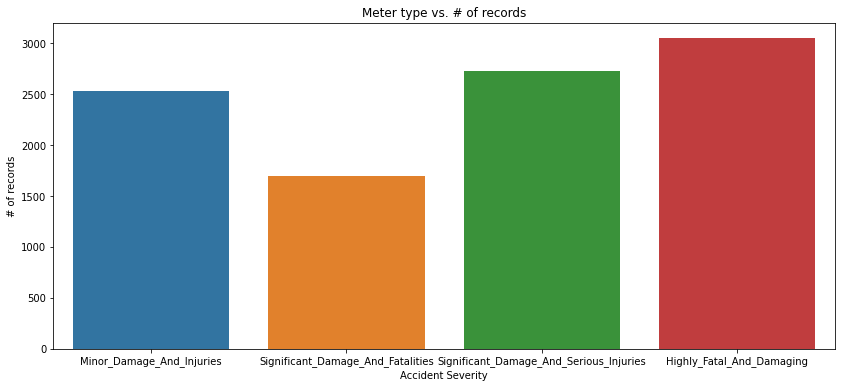

In [ ]:
plt.figure(figsize=(14,6))
CountPlot=sns.countplot(Train_Data['Severity'])
CountPlot.set(xlabel='Accident Severity', ylabel='# of records', title='Meter type vs. # of records')

# Distribution of safety score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


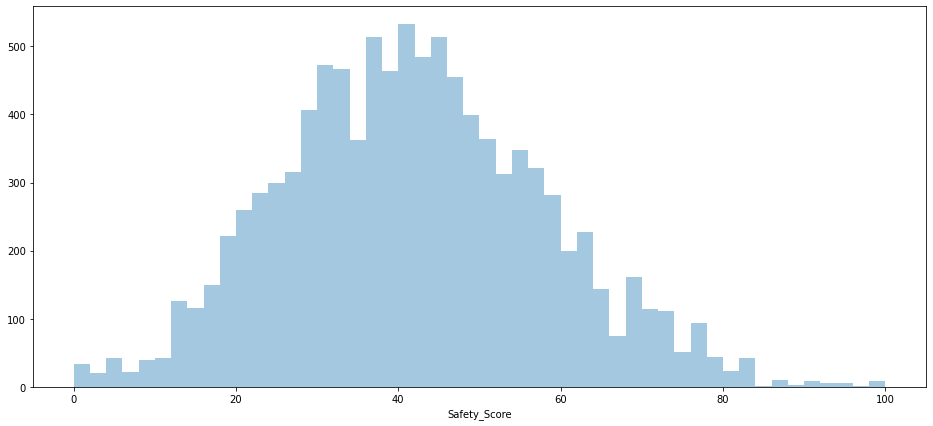

In [ ]:
plt.figure(figsize=(16,7))
plot=sns.distplot(Train_Data['Safety_Score'],kde=False)

#Distribution of days till Last inspection

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


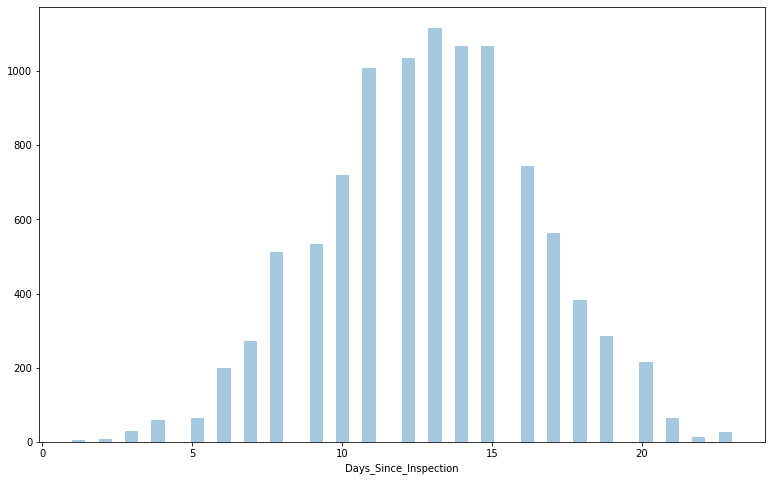

In [ ]:
plt.figure(figsize=(13,8))
Plot=sns.distplot(Train_Data['Days_Since_Inspection'],kde=False)

##Distribution of total safety complaints

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


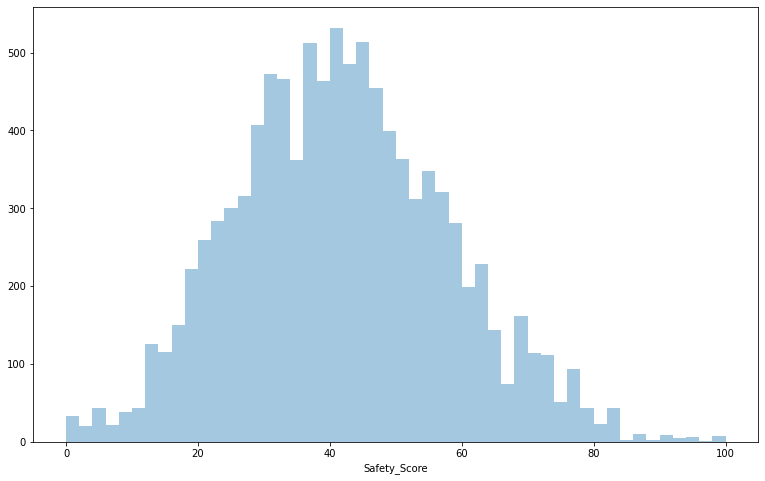

In [ ]:
plt.figure(figsize=(13,8))
Plot=sns.distplot(Train_Data['Safety_Score'],kde=False)

#Distribution of control metric

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


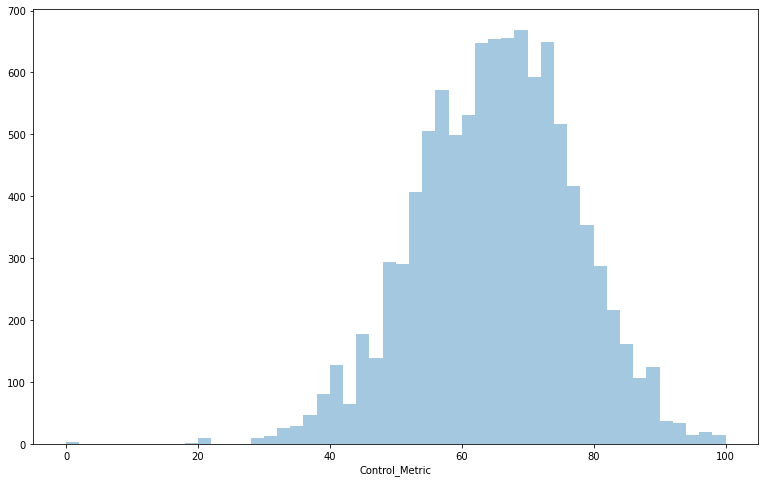

In [ ]:
plt.figure(figsize=(13,8))
Plot=sns.distplot(Train_Data['Control_Metric'],kde=False)

#Distribution of Turbulence

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


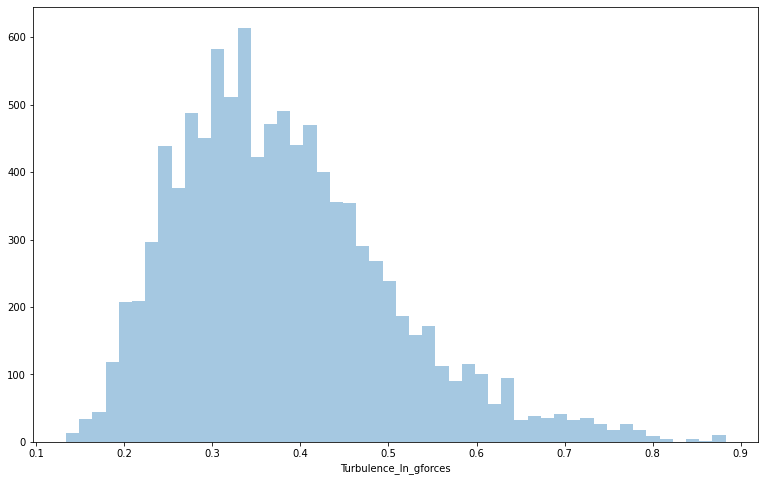

In [ ]:
plt.figure(figsize=(13,8))
Plot=sns.distplot(Train_Data['Turbulence_In_gforces'],kde=False)

#Distribution of Cabin Temperature (deg. F)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


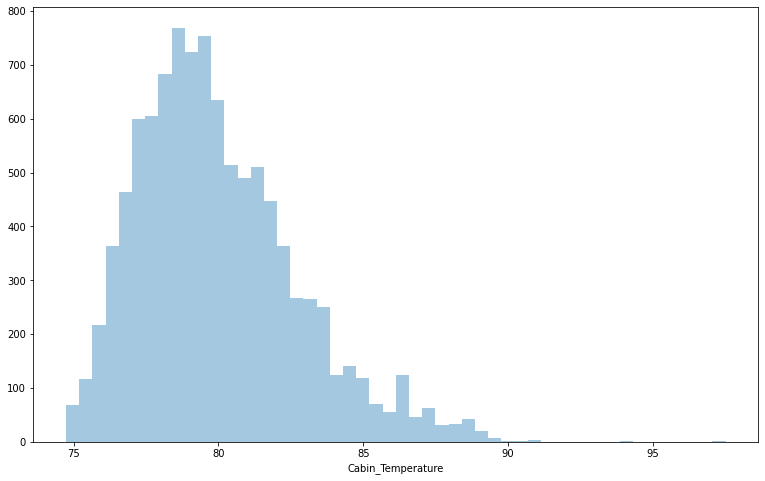

In [ ]:
plt.figure(figsize=(13,8))
Plot=sns.distplot(Train_Data['Cabin_Temperature'],kde=False)

## Distribution of number of violations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


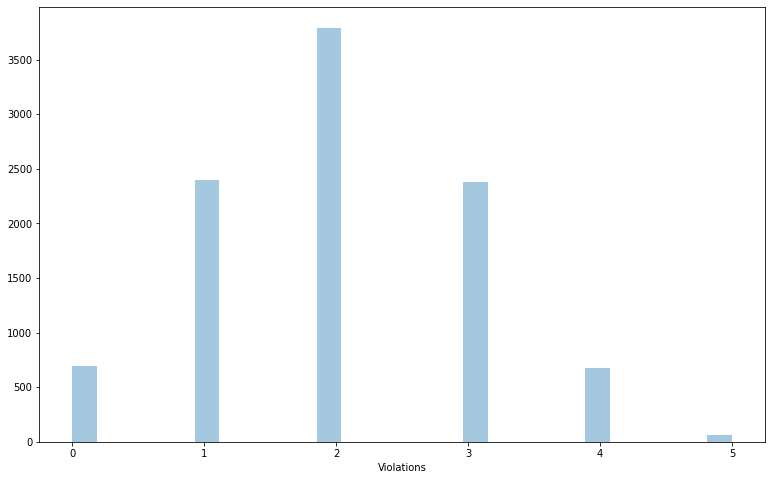

In [ ]:
plt.figure(figsize=(13,8))
Plot=sns.distplot(Train_Data['Violations'],kde=False)

##Distribution of adverse weather metric

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


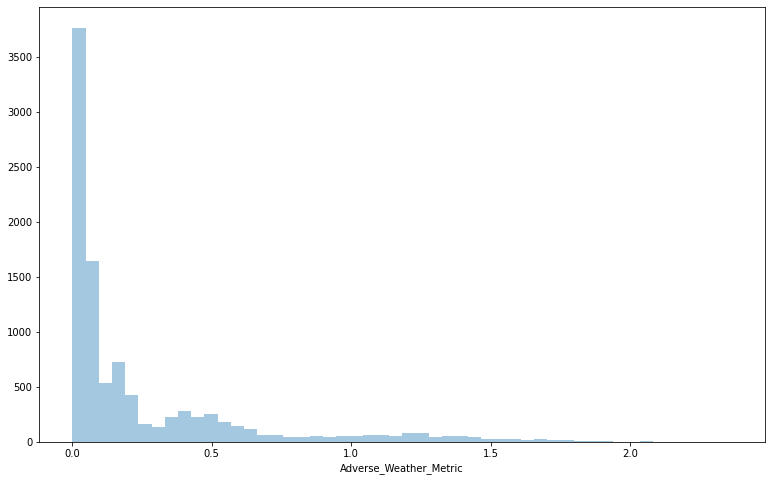

In [ ]:
plt.figure(figsize=(13,8))
Plot=sns.distplot(Train_Data['Adverse_Weather_Metric'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


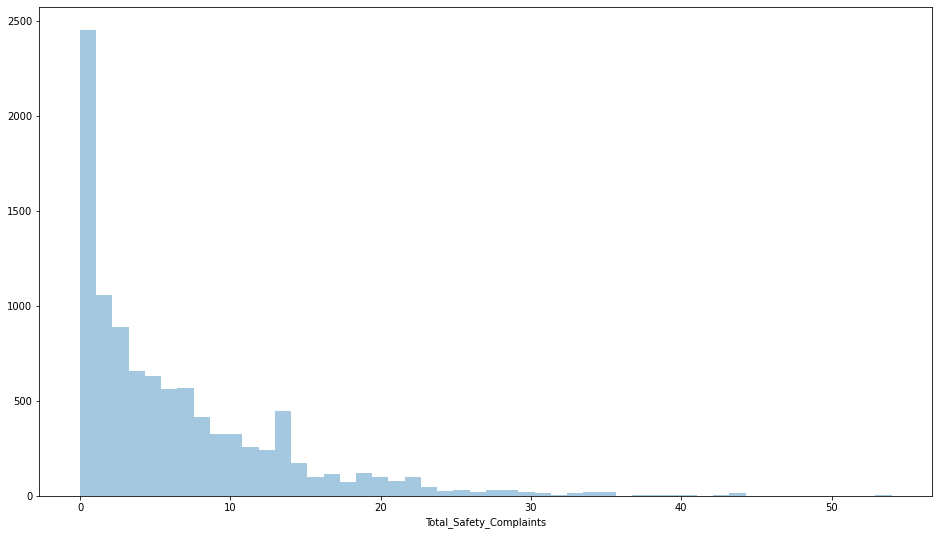

In [ ]:
plt.figure(figsize=(16,9))
plot=sns.distplot(Train_Data['Total_Safety_Complaints'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


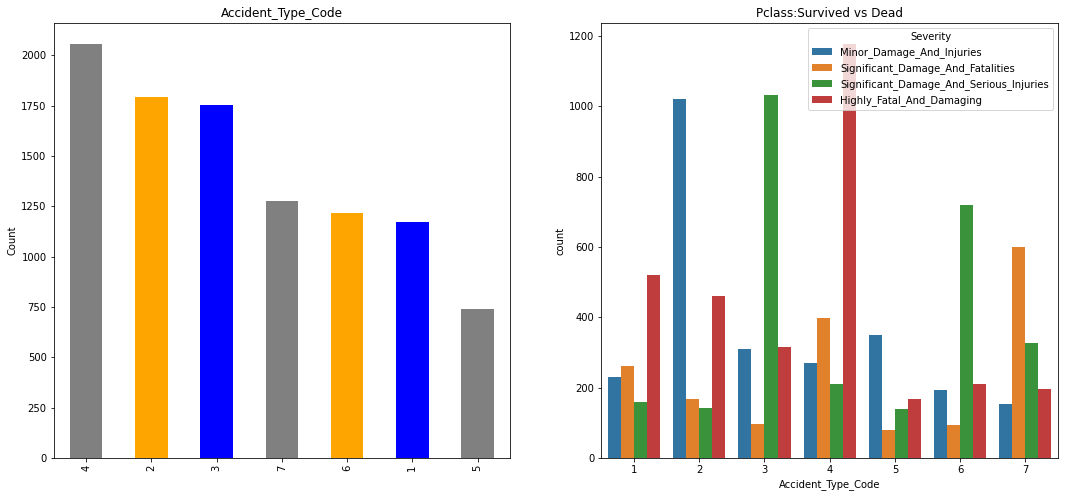

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Train_Data['Accident_Type_Code'].value_counts().plot.bar(color=['grey','orange','blue'],ax=ax[0])
ax[0].set_title('Accident_Type_Code')
ax[0].set_ylabel('Count')
sns.countplot('Accident_Type_Code',hue='Severity',data=Train_Data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


#Machine Learning Models



 ##                                     ***Logistic RegressorModel***



In [57]:
from sklearn.linear_model import LogisticRegression
Model=LogisticRegression() 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##Prediction
Predicting the Test_Data set Results

In [14]:
Y_Pred=Model.predict(Test_Data.drop(['Accident_ID'],axis=1))
Y_Pred

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Highly_Fatal_And_Damaging', ..., 'Highly_Fatal_And_Damaging',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

Create dataFreame using data={'Accident_ID' : Test_Data.Accident_ID, 'Severity' : Y_Pred})

In [15]:
Y_Pred = pd.Series(Y_Pred).astype(str).str.replace('0', 'Minor_Damage_And_Injuries').str.replace('1', 'Significant_Damage_And_Serious_Injuries').str.replace('2', 'Significant_Damage_And_Fatalities').str.replace('3', 'Highly_Fatal_And_Damaging')
sub = pd.DataFrame(data={'Accident_ID' : Test_Data.Accident_ID, 'Severity' : Y_Pred})


##Create and Store Data Sets in "csv" file Using to_csv()

In [ ]:
sub.to_csv('final_pred.csv', index=False)

Predicting the Train_Data set Results

In [ ]:
Y_Prediction_Train_Data=Model.predict(X)
#Y_Prediction_Train_Data
Y_Prediction_Train_Data = pd.Series(Y_Prediction_Train_Data).astype(str).str.replace('0', 'Minor_Damage_And_Injuries').str.replace('1', 'Significant_Damage_And_Serious_Injuries').str.replace('2', 'Significant_Damage_And_Fatalities').str.replace('3', 'Highly_Fatal_And_Damaging')
sub = pd.DataFrame(data={'Accident_ID' : Train_Data.Accident_ID, 'Severity' : Y_Prediction_Train_Data})
sub

## Evalution of Logistic Regression Model

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y,Y_Prediction_Train_Data)

Accuracy_Score=accuracy_score(y,Y_Prediction_Train_Data)
print("Accuracy Score of the Model is : " , Accuracy_Score)


Accuracy Score of the Model is :  0.4133


**## End Logistic regression Model**

##***RandomForestClassifier Model***

In [64]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=10, max_features=0.5 , bootstrap=False)
rfc.fit(X,y)


RandomForestClassifier(bootstrap=False, max_features=0.5, n_estimators=500,
                       n_jobs=-1, random_state=10)

#Prediction
Predicting the Data set Results

In [65]:
Y_Predction=rfc.predict(X)
Y_Predction

array(['Minor_Damage_And_Injuries', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities', ...,
       'Significant_Damage_And_Serious_Injuries',
       'Minor_Damage_And_Injuries', 'Highly_Fatal_And_Damaging'],
      dtype=object)

##Evaluation Criteria

score=100∗(f1_score(actual_values,predicted_values,average=′weighted′))

In [68]:
from sklearn.model_selection import cross_val_score
Cross_Val_Score = cross_val_score(rfc, X, y, cv=4, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()
print("Cross Value Score is: ",Cross_Val_Score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Cross Value Score is:  0.9542065092677177


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   41.3s finished


In [69]:
from sklearn.metrics import f1_score
Score = 100*(f1_score(y,Y_Predction,average='weighted'))
print("Score is :", Score)


Score is : 100.0


**## End Random Forest Classifier Model**